# 导入所需要的包

In [229]:
import cv2
import numpy as np
import time
from matplotlib import pyplot as plt
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage import io

# Step1 读入图片

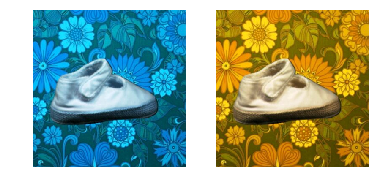

In [221]:
# 读入图片，用cv2读入，为bgr形式
image_ = cv2.imread('./test.png')
# 将图片转换为rgb形式，matplotlib为rbg形式
image = cv2.cvtColor(image_, cv2.COLOR_BGR2RGB)
# 显示bgr形式图，错误！
plt.subplot(121)
plt.axis('off')
plt.imshow(image_) 
# 显示rgb形式图，正确！
plt.subplot(122)
plt.axis('off')
plt.imshow(image)
plt.show()

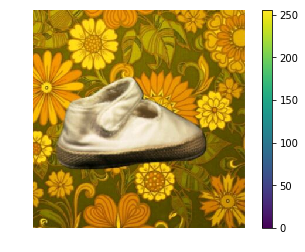

In [222]:
plt.imshow(image)
plt.axis('off')
plt.colorbar()
plt.show()

# Step2 显著性特征

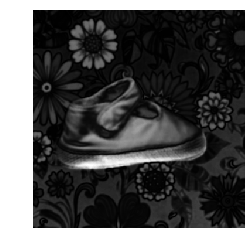

In [223]:
img = image
img = cv2.GaussianBlur(img,(5,5), 0)
gray_lab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
l_mean = np.mean(gray_lab[:,:,0])
a_mean = np.mean(gray_lab[:,:,1])
b_mean = np.mean(gray_lab[:,:,2])
lab = np.square(gray_lab- np.array([l_mean, a_mean, b_mean]))
lab = np.sum(lab,axis=2)
max_ = np.max(lab)
lab = lab/max_
plt.axis('off')
plt.imshow(lab, cmap='gray')
plt.show()

# Step3 SLIC处理

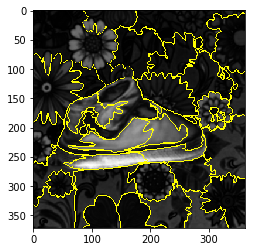

In [233]:
segments = slic(gray_lab, n_segments= 50)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.imshow(mark_boundaries(lab, segments))
plt.show()

# Step4 Grabcut算法

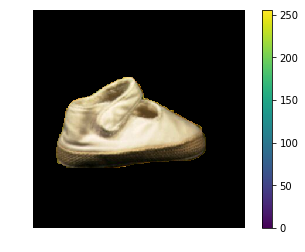

time: 0.684819221496582


In [241]:
image2 = gray_lab
time_start = time.time()
mask = np.zeros(image2.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
# 需要修改，物体的（横坐标，纵坐标，宽度，长度）
rect = (40,110,260,160)
cv2.grabCut(image2,mask,rect,bgdModel,fgdModel,10,cv2.GC_INIT_WITH_RECT)
#代码中将0和2合并为背景 1和3合并为前景
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
image2 = image*mask2[:,:,np.newaxis]
time_end = time.time()
plt.imshow(image2)
plt.colorbar()
plt.axis('off')
plt.show()
print('time:',time_end-time_start)